In [1]:
import json
import pprint
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
patient = 1000
source_type = 'test'

In [3]:
filepath = "/masvol/output/dsb/volume/1/3"
filename = "{0}/{1}_{2}.json".format(filepath,source_type,patient)

In [4]:
filename

'/masvol/output/dsb/volume/1/3/test_1000.json'

In [5]:
jin = None
with open(filename, 'r') as inputs:
    jin = json.load(inputs)
    print (jin, type(jin))

{'sax_53': {'minSL': -53.44714955479303, 'maxSL': -53.44714955479303, 'zmin': 486, 'zmaxframe': 'IM-6377-0001.dcm.npy', 'zmax': 1341, 'zminframe': 'IM-6377-0014.dcm.npy'}, 'sax_52': {'minSL': -43.44715703320493, 'maxSL': -43.44715703320493, 'zmin': 227, 'zmaxframe': 'IM-6376-0030.dcm.npy', 'zmax': 1541, 'zminframe': 'IM-6376-0014.dcm.npy'}, 'sax_55': {'minSL': -73.44714163258597, 'maxSL': -73.44714163258597, 'zmin': 0, 'zmaxframe': 'IM-6379-0001.dcm.npy', 'zmax': 504, 'zminframe': 'IM-6379-0011.dcm.npy'}, 'sax_50': {'minSL': -23.447165442914226, 'maxSL': -23.447165442914226, 'zmin': 1162, 'zmaxframe': 'IM-6374-0030.dcm.npy', 'zmax': 1785, 'zminframe': 'IM-6374-0019.dcm.npy'}, 'sax_48': {'minSL': -3.447172536162782, 'maxSL': -3.447172536162782, 'zmin': 1021, 'zmaxframe': 'IM-6372-0001.dcm.npy', 'zmax': 1511, 'zminframe': 'IM-6372-0017.dcm.npy'}, 'sax_56': {'minSL': -83.44713870828524, 'maxSL': None, 'zmin': 0, 'zmaxframe': '', 'zmax': 0, 'zminframe': 'IM-6380-0009.dcm.npy'}, 'sax_54': {

#### maxSL = max slice location
#### minSL = min slice location
#### zmax = max ones count
#### zmin = min ones count
#### We were counting zeroes so the z letter stuck to be part of the variable name.  But the counts are for ones from the predictions
#### Some don't have any prediction so you see zmax 0 or zmin 0 with maxSL = None and zmaxframe = ''

In [6]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(jin)

{   'sax_48': {   'maxSL': -3.447172536162782,
                  'minSL': -3.447172536162782,
                  'zmax': 1511,
                  'zmaxframe': 'IM-6372-0001.dcm.npy',
                  'zmin': 1021,
                  'zminframe': 'IM-6372-0017.dcm.npy'},
    'sax_49': {   'maxSL': -13.44716792269449,
                  'minSL': -13.44716792269449,
                  'zmax': 1399,
                  'zmaxframe': 'IM-6373-0002.dcm.npy',
                  'zmin': 877,
                  'zminframe': 'IM-6373-0019.dcm.npy'},
    'sax_50': {   'maxSL': -23.447165442914226,
                  'minSL': -23.447165442914226,
                  'zmax': 1785,
                  'zmaxframe': 'IM-6374-0030.dcm.npy',
                  'zmin': 1162,
                  'zminframe': 'IM-6374-0019.dcm.npy'},
    'sax_51': {   'maxSL': -33.4471595129903,
                  'minSL': -33.4471595129903,
                  'zmax': 1656,
                  'zmaxframe': 'IM-6375-0030.dcm.npy',
             

In [7]:
dcmarraypath = "/opt/output/dsb/norm/1/3"
dcmfilepath = "{0}/{1}/{2}".format(dcmarraypath,source_type,patient)

In [8]:
!ls $dcmfilepath/sax_56_IM-6380-0009.dcm.npy

/opt/output/dsb/norm/1/3/test/1000/sax_56_IM-6380-0009.dcm.npy


sax_48 min -3.447172536162782 (360, 270) 1 <class 'numpy.ndarray'>
sax_49 min -13.44716792269449 (360, 270) 1 <class 'numpy.ndarray'>
sax_50 min -23.447165442914226 (360, 270) 1 <class 'numpy.ndarray'>
sax_51 min -33.4471595129903 (360, 270) 1 <class 'numpy.ndarray'>
sax_52 min -43.44715703320493 (360, 270) 1 <class 'numpy.ndarray'>
sax_53 min -53.44714955479303 (360, 270) 1 <class 'numpy.ndarray'>
sax_54 min -63.44714813598998 (360, 270) 1 <class 'numpy.ndarray'>
sax_55 min -73.44714163258597 (360, 270) 1 <class 'numpy.ndarray'>
sax_56 min -83.44713870828524 (360, 270) 1 <class 'numpy.ndarray'>
sax_55 max -73.44714163258597 (360, 270) 2 <class 'list'>


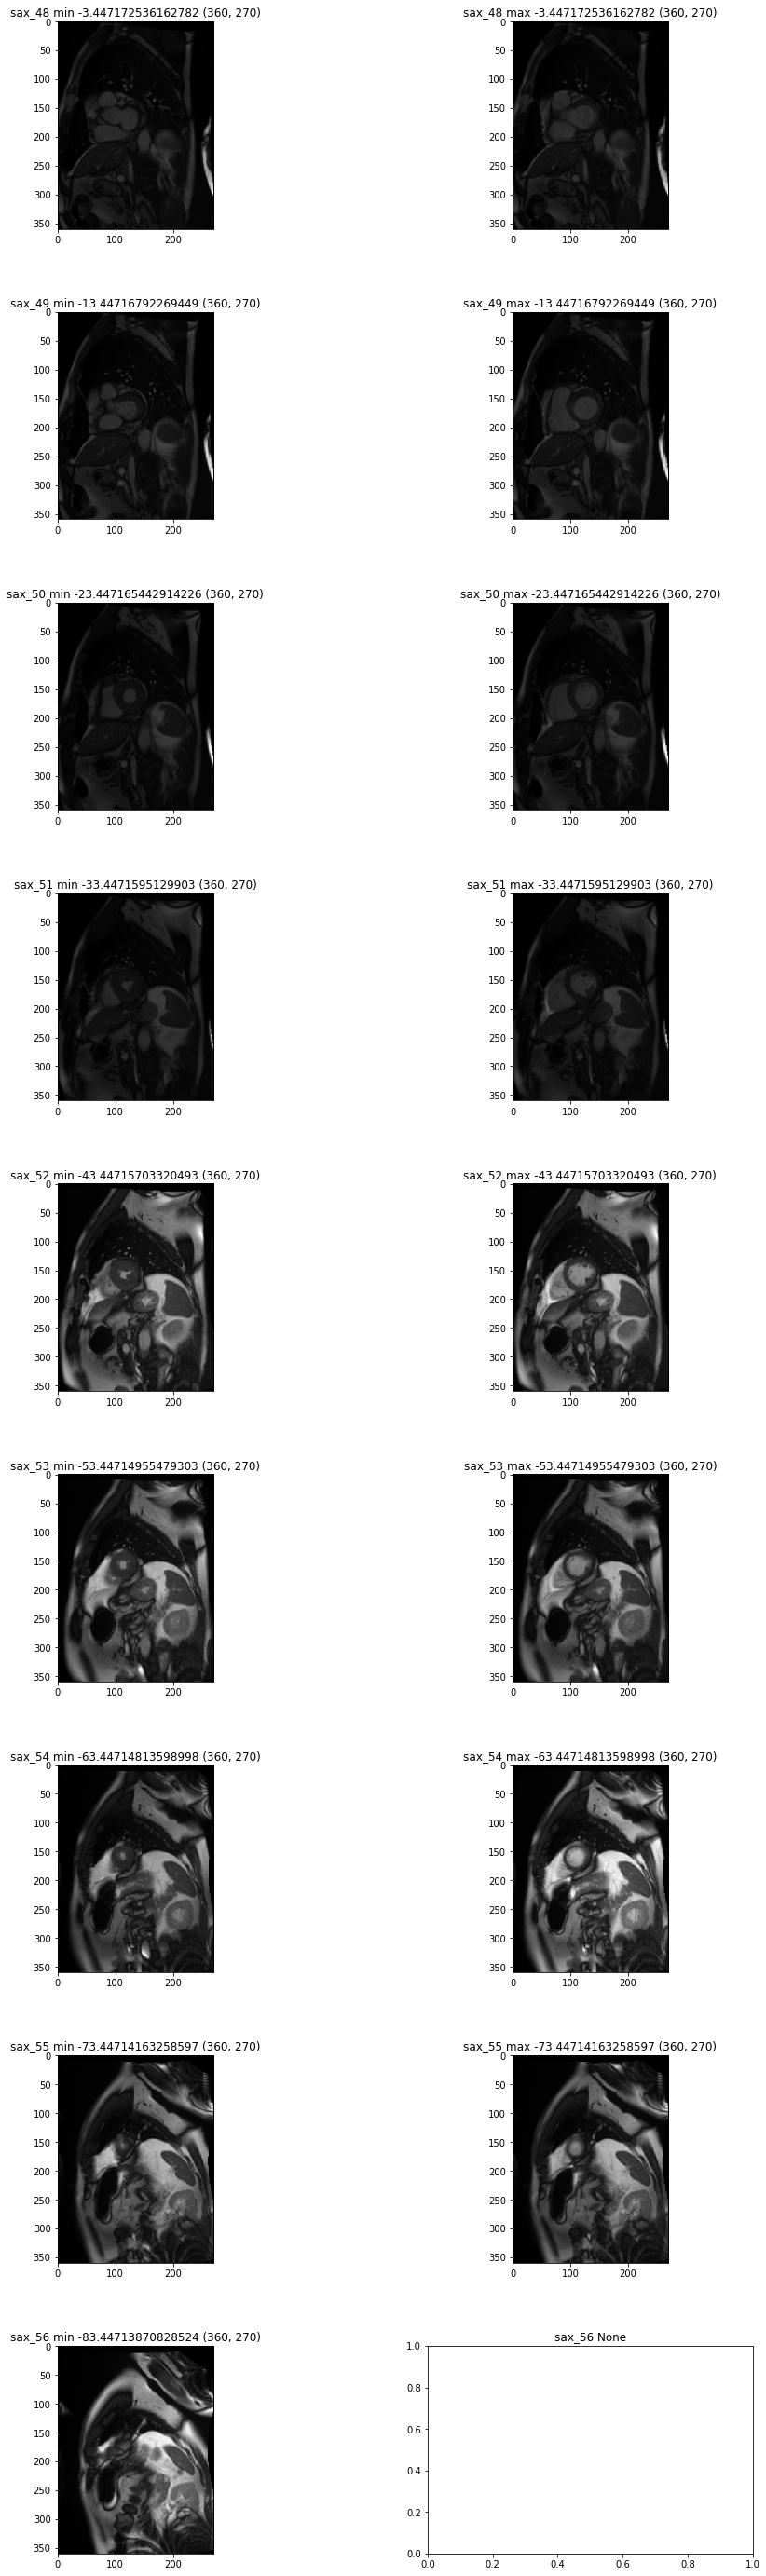

In [9]:
rowcount = len(jin.keys())
#print (rowcount)

scount = 0

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace=0.4, wspace=0.4);

for sax in sorted(jin):
    maxsl = jin[sax]['maxSL']
    minsl = jin[sax]['minSL']
    minones = jin[sax]['zmin']
    maxones = jin[sax]['zmax']
    minframe = jin[sax]['zminframe']
    maxframe = jin[sax]['zmaxframe']
    dcmfilemin = "{0}/{1}/{2}/{3}_{4}".format(dcmarraypath,source_type,patient,sax,minframe)
    dcmfilemax = "{0}/{1}/{2}/{3}_{4}".format(dcmarraypath,source_type,patient,sax,maxframe)
    minimg = []
    maximg = []
    scount += 1
    #print ('scount',scount)
    
    if os.path.isfile(dcmfilemin):
        minimg = np.load(dcmfilemin)

    if os.path.isfile(dcmfilemax):
        maximg = np.load(dcmfilemax)

    ax = fig.add_subplot(rowcount, 2, scount)
    title1 = "{0} min {1} {2}".format(sax,minsl,minimg.shape)
    print (title1,1,type(minimg))
    ax.imshow(minimg, cmap = 'gray')
    
    ax.set_title(title1)
    scount += 1
    
    ax = fig.add_subplot(rowcount, 2, scount)
    
    try:
        title2 = "{0} max {1} {2}".format(sax,maxsl,maximg.shape)
        ax.imshow(maximg, cmap = 'gray')
    except:
        print (title2,2,type(maximg))
        title2 = "{0} {1}".format(sax,maxsl)
        
    ax.set_title(title2)
    
plt.show()